# Final script in Forward.py

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from pathlib import Path
import torch
import torchvision
import torchvision.utils as utils
import torch.nn.functional as F
import torch.nn as nn
import gc
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
model = torch.load("torchM")

In [4]:
path_img = Path("Figaro-1k/Original/")
path_seg = Path("Figaro-1k/GT")

In [5]:
def Unsqueezer(img):
    return img.unsqueeze(0)

ImageTransforms = torchvision.transforms.Compose([torchvision.transforms.Resize((500,500)), torchvision.transforms.ToTensor(),
                                                  torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
                                                  Unsqueezer])

In [40]:

img = PIL.Image.open(path_img/"Testing/Frame00010-org.jpg")
print(img.size)
img = ImageTransforms(img).cuda()


(428, 571)


In [7]:
model.eval()
res = torch.sigmoid(model(img))

In [12]:
res = res.argmax(dim=1)

In [28]:
res.shape

torch.Size([1, 500, 500])

In [20]:
def show_tensor_as_image(tensor, ncols=5, figsize=12, title = ""):
    plt.figure(figsize=(figsize,figsize))
    plt.axis("off")
    plt.title(title)
    plt.imshow(np.transpose(utils.make_grid(tensor.detach().cpu()[:ncols*ncols], nrow=ncols, padding=2).cpu(),(1,2,0)))

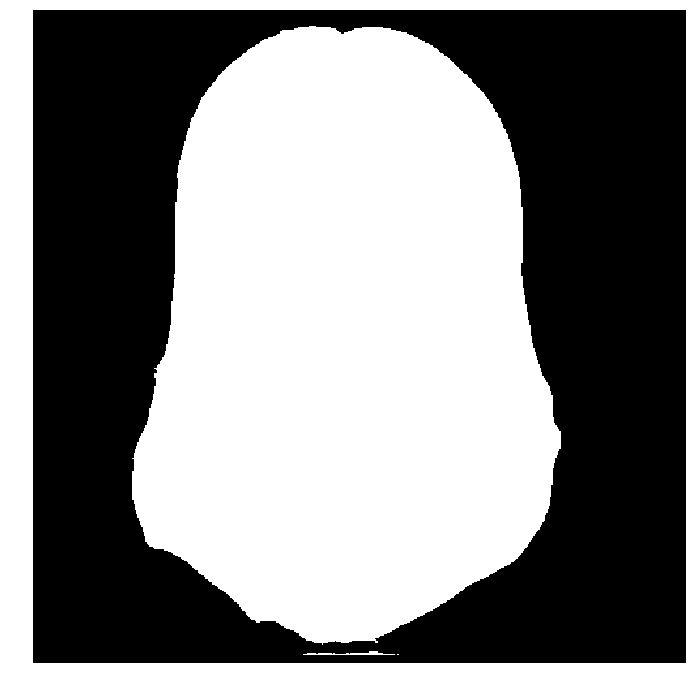

In [27]:
show_tensor_as_image(res)

In [24]:
to_pil = torchvision.transforms.ToPILImage()

In [29]:
resS = res.squeeze()
resS.shape

torch.Size([500, 500])

In [46]:
p_img = to_pil(res.detach().cpu().type(torch.ByteTensor))

In [ ]:
def Forward(inputImgName: str, outputImgName: str):
    path = Path("Figaro-1k/Original/Testing/") #change this
    img = PIL.Image.open(path/inputImgName)
    model

In [50]:
p_img = p_img.resize((428,571))
p_img.size

(428, 571)

In [51]:
p_img.save("segmentation.pbm")